Name: Rohan Menon<br>
Roll No: 21102B0040<br>
Batch: 3<br>
github-https://github.com/Rp2567/Titanic

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing train dataset
df = pd.read_csv(r'train.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**<h1>EDA</h1>** 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

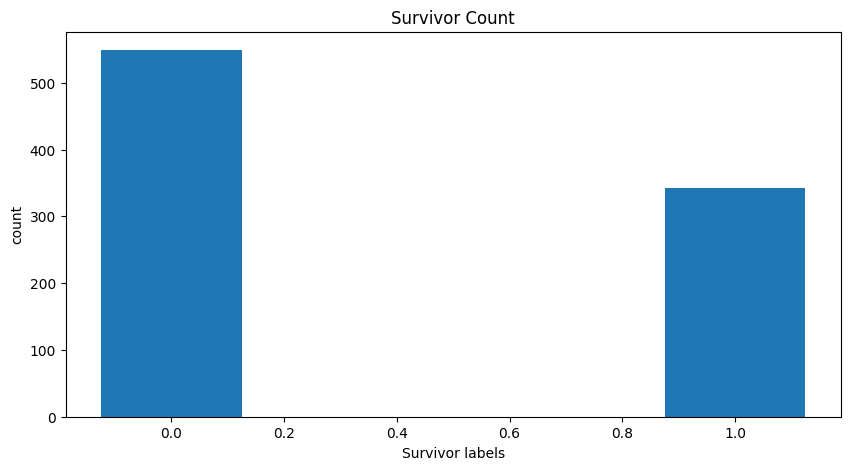

In [9]:
# 
survived_count = df['Survived'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(survived_count.index, survived_count, width=0.25)
plt.title("Survivor Count")
plt.xlabel("Survivor labels")
plt.ylabel("count")
plt.show()

C:\Users\omgha\AppData\Local\Temp\ipykernel_23148\1970134157.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Survived", y="Age", data=df, palette='viridis')


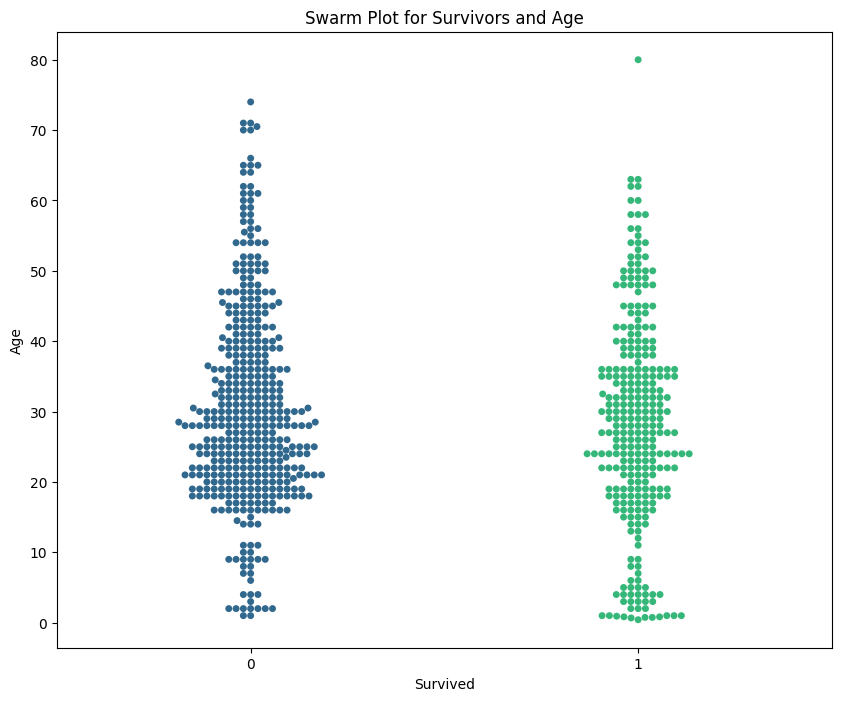

In [10]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 8))

# Using Seaborn to create a swarm plot
sns.swarmplot(x="Survived", y="Age", data=df, palette='viridis')

plt.title('Swarm Plot for Survivors and Age')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


## **Data Preprocessing** ##

In [11]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [12]:
#correlation DF
cdf = df.drop({'Name','Cabin', 'Fare', 'Ticket'}, axis="columns")

In [13]:
print(df['Sex'].unique())
print(df["Embarked"].unique())
print(df["Pclass"].unique())

['male' 'female']
['S' 'C' 'Q' nan]
[3 1 2]


In [14]:
one_hot_encoded_data = pd.get_dummies(cdf, columns = ['Pclass','Sex', 'Embarked'])
print(one_hot_encoded_data)


     PassengerId  Survived        Age  SibSp  Parch  Pclass_1  Pclass_2  \
0              1         0  22.000000      1      0     False     False   
1              2         1  38.000000      1      0      True     False   
2              3         1  26.000000      0      0     False     False   
3              4         1  35.000000      1      0      True     False   
4              5         0  35.000000      0      0     False     False   
..           ...       ...        ...    ...    ...       ...       ...   
886          887         0  27.000000      0      0     False      True   
887          888         1  19.000000      0      0      True     False   
888          889         0  29.699118      1      2     False     False   
889          890         1  26.000000      0      0      True     False   
890          891         0  32.000000      0      0     False     False   

     Pclass_3  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0        True       False

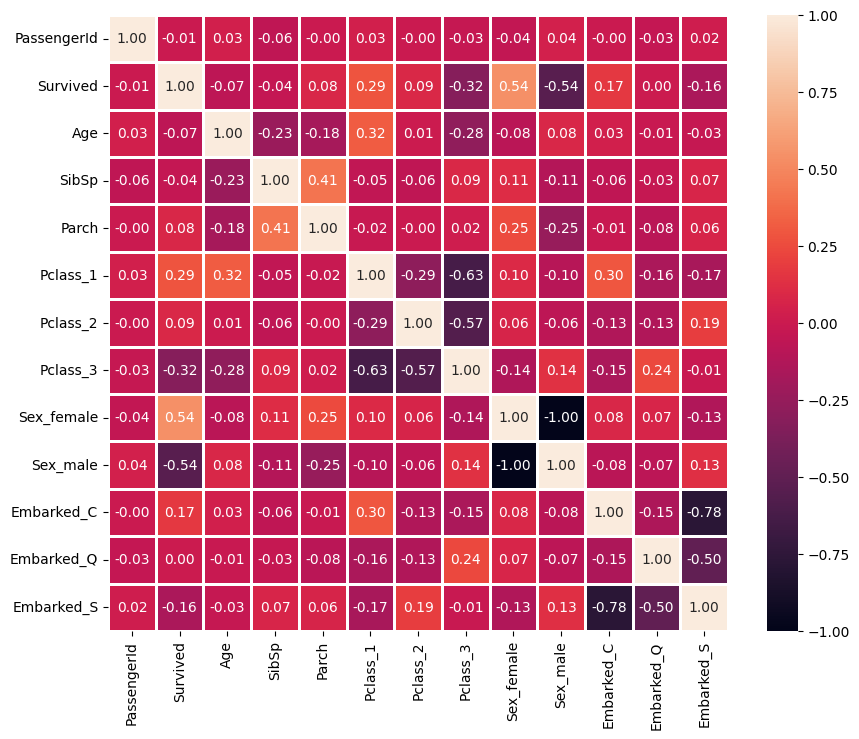

In [15]:
#correlation DF
#cdf = df.drop('Name', axis="columns") 

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 8))

# Using Seaborn to create a heatmap
sns.heatmap(one_hot_encoded_data.corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

## **Training the Model** ##

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, recall_score, confusion_matrix,classification_report

In [17]:
x_train,y_train = one_hot_encoded_data.drop("Survived", axis="columns"), one_hot_encoded_data["Survived"]

In [18]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\omgha\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## **Loading the Test data** ##

In [19]:
Test_df = pd.read_csv(r'test.csv')

In [20]:
Test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
Test_df.shape

(418, 11)

In [22]:
Test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
Test_df = Test_df.drop({"Name", "Fare", "Cabin", "Ticket"}, axis="columns")

In [24]:
Test_df["Age"] = Test_df["Age"].fillna(Test_df["Age"].mean())

In [25]:
x_test = pd.get_dummies(Test_df, columns = ['Pclass','Sex', 'Embarked'])
print(one_hot_encoded_data)


     PassengerId  Survived        Age  SibSp  Parch  Pclass_1  Pclass_2  \
0              1         0  22.000000      1      0     False     False   
1              2         1  38.000000      1      0      True     False   
2              3         1  26.000000      0      0     False     False   
3              4         1  35.000000      1      0      True     False   
4              5         0  35.000000      0      0     False     False   
..           ...       ...        ...    ...    ...       ...       ...   
886          887         0  27.000000      0      0     False      True   
887          888         1  19.000000      0      0      True     False   
888          889         0  29.699118      1      2     False     False   
889          890         1  26.000000      0      0      True     False   
890          891         0  32.000000      0      0     False     False   

     Pclass_3  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0        True       False

In [26]:
x_test.head()

,PassengerId,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,False,False,True,False,True,False,True,False
1,893,47.0,1,0,False,False,True,True,False,False,False,True
2,894,62.0,0,0,False,True,False,False,True,False,True,False
3,895,27.0,0,0,False,False,True,False,True,False,False,True
4,896,22.0,1,1,False,False,True,True,False,False,False,True


In [27]:
y_test = pd.read_csv(r'gender_submission.csv')

In [28]:
y_test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## **Testing the model** ##

In [29]:
y_pred = model.predict(x_test)

In [30]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [31]:
accuracy = accuracy_score(y_test["Survived"], y_pred)
print(accuracy*100)

94.73684210526315


In [32]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test["Survived"], y_pred))
print("\nClassification Report:\n", classification_report(y_test["Survived"], y_pred))


Confusion Matrix:
 [[252  14]
 [  8 144]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       266
           1       0.91      0.95      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.95      0.94       418
weighted avg       0.95      0.95      0.95       418



Feature: 1, Score: 0.00010
Feature: 2, Score: -0.03852
Feature: 3, Score: -0.30383
Feature: 4, Score: -0.07015
Feature: 5, Score: 1.31230
Feature: 6, Score: 0.27809
Feature: 7, Score: -0.89387
Feature: 8, Score: 1.68766
Feature: 9, Score: -0.99114
Feature: 10, Score: 0.46630
Feature: 11, Score: 0.26039
Feature: 12, Score: -0.07585


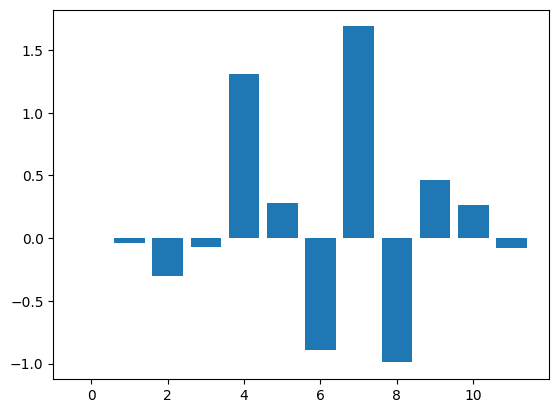

In [35]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i+1,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Based on the above plot, we can infer that the model depends on the Pclass which is the passenger class and gender of the passenger